In [1]:
import scripts.init_gpu as init_gpu
import scripts.init_dataset as init_dataset
from scripts.triplet_functions import n_neurons
import pandas as pd
import os


os.environ['CUDA_VISIBLE_DEVICES'] = '1'

init_gpu.initialize_gpus()

locations = ['LOC2', 'LOC3']

print("Loading Dataset...")
# load the dataset
df = pd.read_csv(
    f"../dataset/processed/{locations[0]}-{locations[1]}-scaled-balanced.csv")

length = len(df.columns) - 2  # subtract the two label columns

# get train-test set
train_df, test_df, train_web_samples, test_web_samples = init_dataset.get_sample(
    df, locations, range(1500), 1200)

train_df.head()

Num GPUs Available:  0
Loading Dataset...
Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 

c:\Users\kaush\Documents\Python Projects\DoH-Synthesis\code\scripts\init_dataset.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


,Location,Website,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,LOC2,0,-0.714089,0.541197,0.391921,-0.400778,-0.266345,-0.522526,0.023889,-0.261817,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
1,LOC2,1006,0.093792,-1.273349,-2.142801,1.205098,1.879002,2.139593,1.482513,2.382939,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
2,LOC2,1006,1.401091,-1.636258,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
3,LOC2,1006,-0.831599,0.662167,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
4,LOC2,1006,0.093792,-1.152379,-2.007616,0.827245,1.630266,1.666328,1.281324,2.311938,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216


In [2]:
import tensorflow as tf
from scripts.train_vae import VAE, Sampling, ConvVAE, ConvVAE_BatchNorm

# load models

latent_dim = 96
vae_model = tf.keras.models.load_model(f"../models-{locations[0]}-{locations[1]}/vae/ci_vae/ConvBased/domain_and_class/vae-e1000-mse1-kl0.0001-cl1.0-ldim96-hdim128.keras", custom_objects={'ConvVAE_BatchNorm': ConvVAE_BatchNorm, 'Sampling': Sampling})
domain_discriminator = tf.keras.models.load_model(f"../models-{locations[0]}-{locations[1]}/vae/ci_vae/ConvBased/domain_and_class/domain-discriminator-e1000.keras")
class_discriminator = tf.keras.models.load_model(f"../models-{locations[0]}-{locations[1]}/vae/ci_vae/ConvBased/domain_and_class/class-discriminator-e1000.keras")
# web_model = tf.keras.models.load_model(f"../models/website/domain_invariant/{locations[0]}-{locations[1]}-baseGRU-epochs100-train_samples1200-triplet_samples5-domain_invariant-l1.keras")
# location_classifier = tf.keras.models.load_model(f"../models/classification/location/dense.keras")
# latent_location_classifier = tf.keras.models.load_model(f"../models/classification/location/latent_ci_vae-e880_both_classifier.keras")
# triplet_location_classifier = tf.keras.models.load_model(f"../models/classification/location/triplet_classifier.keras")

c:\Users\kaush\pyenv\ml_env\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


# Is there a location dimension?

In [3]:
import numpy as np
def get_z_embeddings(data, vae_model=vae_model):
    embeddings = []
    chunk_size = 1000
    for i in range(0, len(data), chunk_size):
        chunk = data[i:i+chunk_size]
        _, _, transformed_chunk = vae_model.encode(chunk)
        embeddings.append(transformed_chunk)

    return np.vstack(embeddings)

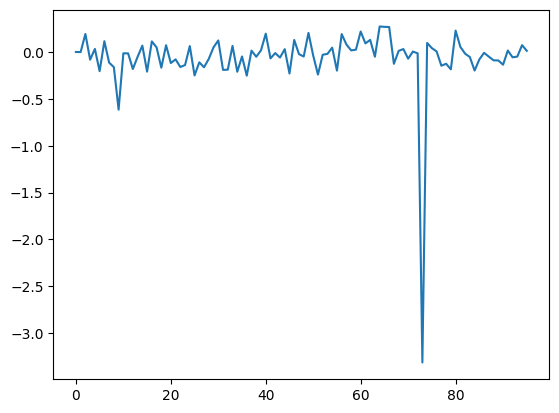

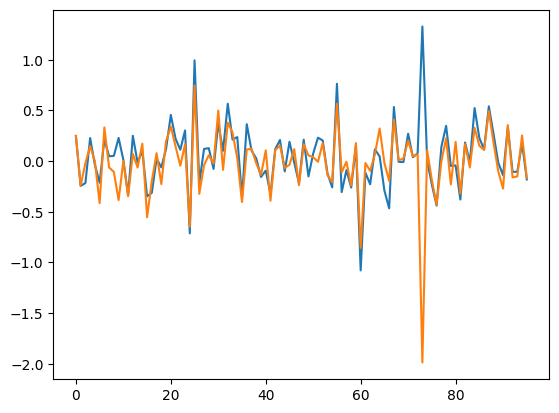

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


source_location, target_location = locations
source_data = train_df[(train_df['Location'] == source_location)].iloc[:, 2:]
target_data = train_df[(train_df['Location'] == target_location)].iloc[:, 2:]




source_latent_embeddings = get_z_embeddings(source_data)
target_latent_embeddings = get_z_embeddings(target_data)

diff = target_latent_embeddings - source_latent_embeddings


mean_diff = diff.mean(axis=0)

plt.figure()
plt.plot(mean_diff)
# for i in range(0, len(diff), 100):
#     plt.plot(diff[i], alpha = 0.2, c = 'b')
plt.show()

plt.figure()
plt.plot(source_latent_embeddings.mean(axis=0))
plt.plot(target_latent_embeddings.mean(axis=0))
plt.show()

## select a website, sample two points from the latent space and traverse and see what happens to the output and triplet embedding

In [5]:
import random
selected_website = random.sample(test_web_samples, 1)[0]
source_location, target_location = locations
source_sample = test_df[(test_df['Website'] == selected_website) & (test_df['Location'] == source_location)].iloc[:, 2:].sample()
LOC2_sample = test_df[(test_df['Website'] == selected_website) & (test_df['Location'] == target_location)].iloc[:, 2:].sample()



_, _, LOC1_latent_embedding = vae_model.encode(source_sample)
_, _, LOC2_latent_embedding = vae_model.encode(LOC2_sample)

diff = LOC2_latent_embedding - LOC1_latent_embedding


# Interpolate

In [80]:

import numpy as np
def slerp(p0, p1, alpha):
    """
    Perform spherical linear interpolation (slerp) between two vectors.

    Args:
        p0 (np.ndarray): The starting vector.
        p1 (np.ndarray): The ending vector.
        alpha (float): The interpolation factor (0 = p0, 1 = p1).

    Returns:
        np.ndarray: The interpolated vector.
    """
    # Ensure the vectors are 1D
    p0 = p0.squeeze()
    p1 = p1.squeeze()

    # Normalize the input vectors
    p0 = p0 / np.linalg.norm(p0)
    p1 = p1 / np.linalg.norm(p1)

    # Compute the cosine of the angle between the vectors
    dot_product = np.dot(p0, p1)
    dot_product = np.clip(dot_product, -1.0, 1.0)  # Clamp to avoid numerical errors

    # Compute the angle (theta)
    theta = np.arccos(dot_product)
    print(f"Theta: {theta}")
    # Avoid division by zero when vectors are very close
    if theta < 1e-6:
        return (1 - alpha) * p0 + alpha * p1

    # Compute the spherical interpolation
    sin_theta = np.sin(theta)
    p0_weight = np.sin((1 - alpha) * theta) / sin_theta
    p1_weight = np.sin(alpha * theta) / sin_theta
    return p0_weight * p0 + p1_weight * p1

# Perform spherical interpolation
interpolated_embeddings = []
num_steps = 10
for step in range(num_steps):
    alpha = step / (num_steps - 1)
    interpolated_embedding = slerp(LOC1_latent_embedding[0].numpy(), LOC2_latent_embedding[0].numpy(), alpha)
    interpolated_embeddings.append(interpolated_embedding.reshape(1, -1))

interpolated_embeddings = np.array(interpolated_embeddings)


# Check cosine similarity and angle
dot_product = np.dot(LOC1_latent_embedding[0].numpy(), LOC2_latent_embedding[0].numpy())
cosine_similarity = np.clip(dot_product, -1.0, 1.0)
theta = np.arccos(cosine_similarity)
print(f"Cosine similarity: {cosine_similarity}, Angle (theta): {theta}")

Theta: 1.5505366818557498
Theta: 1.5505366818557498
Theta: 1.5505366818557498
Theta: 1.5505366818557498
Theta: 1.5505366818557498
Theta: 1.5505366818557498
Theta: 1.5505366818557498
Theta: 1.5505366818557498
Theta: 1.5505366818557498
Theta: 1.5505366818557498
Cosine similarity: 1.0, Angle (theta): 0.0


In [6]:
import joblib
from sklearn.preprocessing import LabelEncoder
from scripts.classification import preprocess_data_for_web_classification

knn_web_classifier = joblib.load("../models/classification/website/KNN-TripletEpochs100-Samples5-DomainInvariant.pkl")
_, _, _, _, le = preprocess_data_for_web_classification(test_df, source_location, target_location) 

In [7]:
y_pred_interpolated = knn_web_classifier.predict(web_model(vae_model.decode(LOC1_latent_embedding)))
predicted_website = le.classes_[y_pred_interpolated[0]]
print(f"LOC1 Predicted Website: {predicted_website}")

y_pred_interpolated = knn_web_classifier.predict(web_model(vae_model.decode(LOC2_latent_embedding)))
predicted_website = le.classes_[y_pred_interpolated[0]]
print(f"LOC2 Predicted Website: {predicted_website}")

LOC1 Predicted Website: 547
LOC2 Predicted Website: 1331


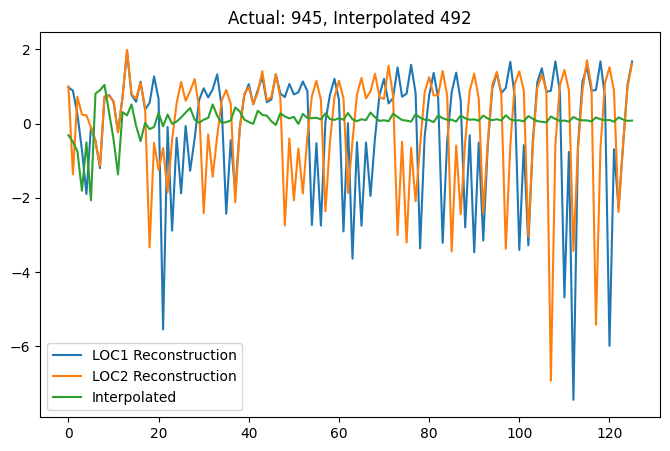

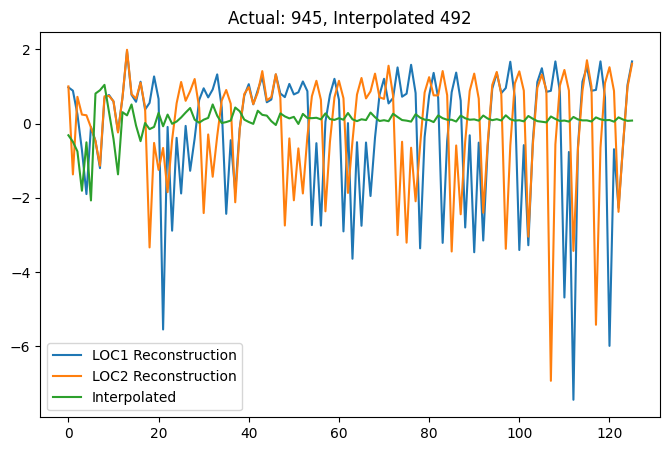

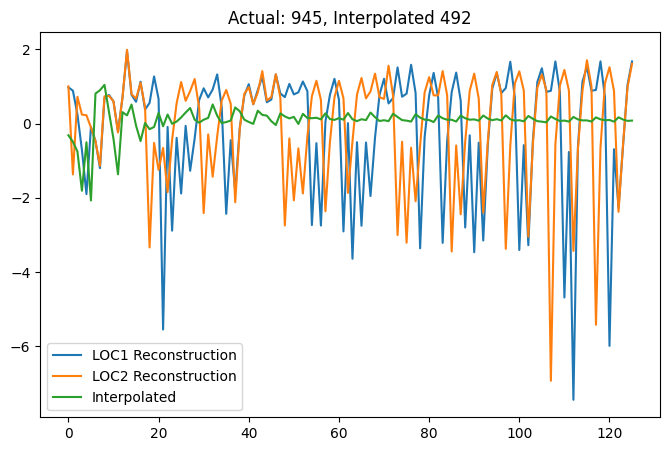

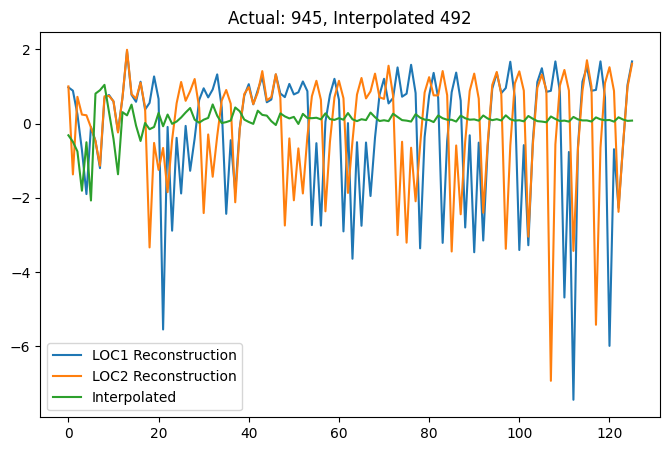

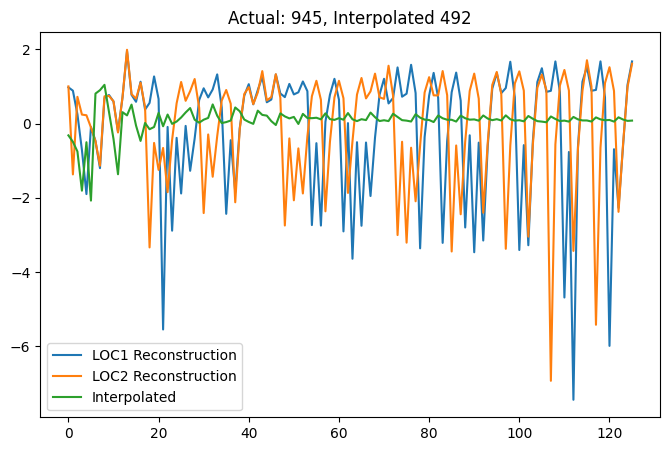

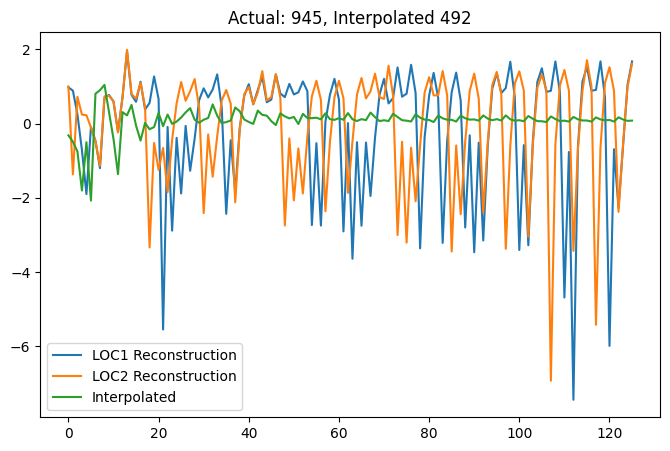

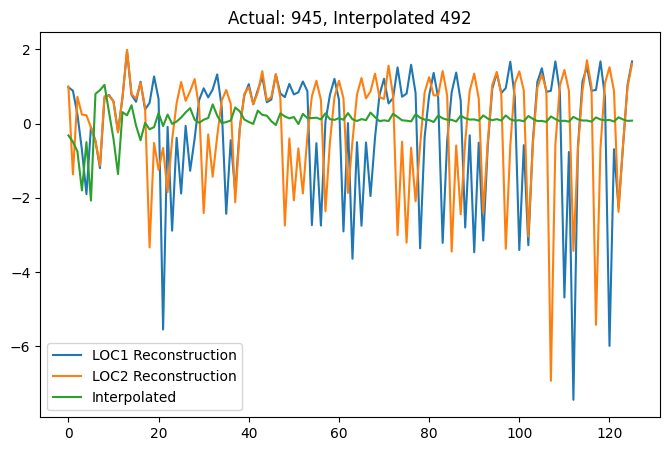

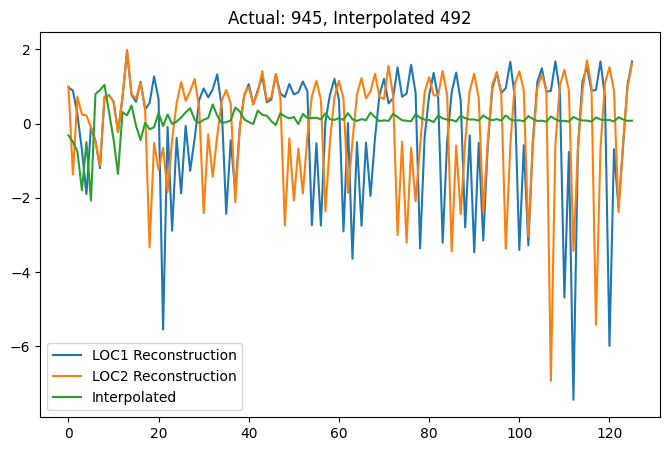

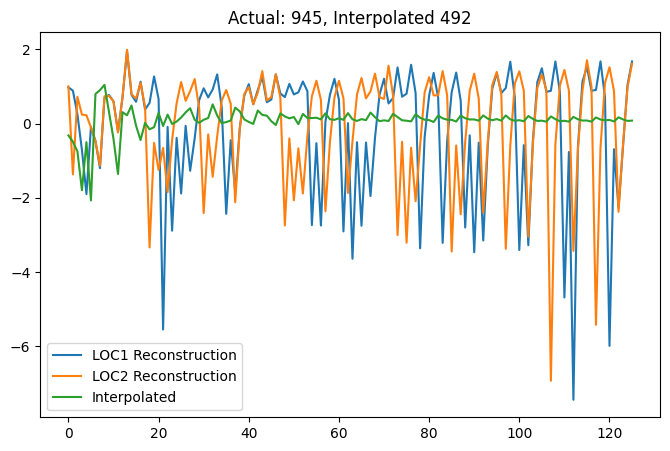

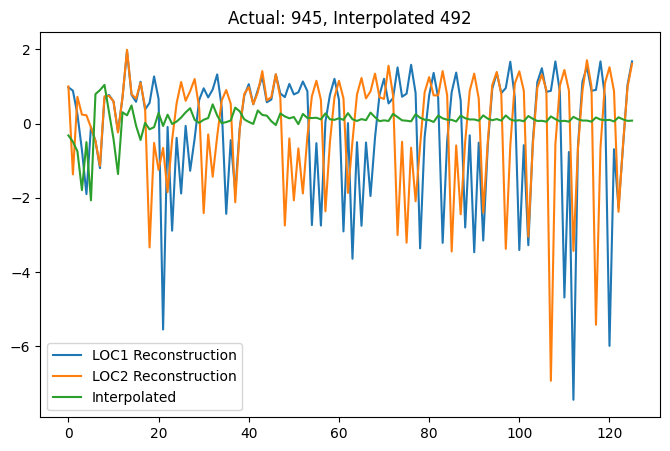

In [8]:
import matplotlib.pyplot as plt


for i in range(0, len(interpolated_embeddings),1):
    plt.figure(figsize=(8, 5))
    plt.plot(vae_model.decode(LOC1_latent_embedding)[0], label='LOC1 Reconstruction')
    # plt.plot(LOC1_sample.to_numpy()[0], label='LOC1 Sample')

    plt.plot(vae_model.decode(LOC2_latent_embedding)[0], label='LOC2 Reconstruction')
    # plt.plot(LOC2_sample.to_numpy()[0], label='LOC2 Sample')
    
    plt.plot(vae_model.decode(interpolated_embeddings[i])[0], label='Interpolated')
    
    
    # predict class
    y_pred_interpolated = knn_web_classifier.predict(web_model(vae_model.decode(interpolated_embeddings[i])))
    predicted_website = le.classes_[y_pred_interpolated[0]]
    
    
    plt.title(f"Actual: {selected_website}, Interpolated {predicted_website}")
    plt.legend()
    plt.show()
    plt.close()
    

# How does the two loss functions change with the interpolations

## Triplet Loss

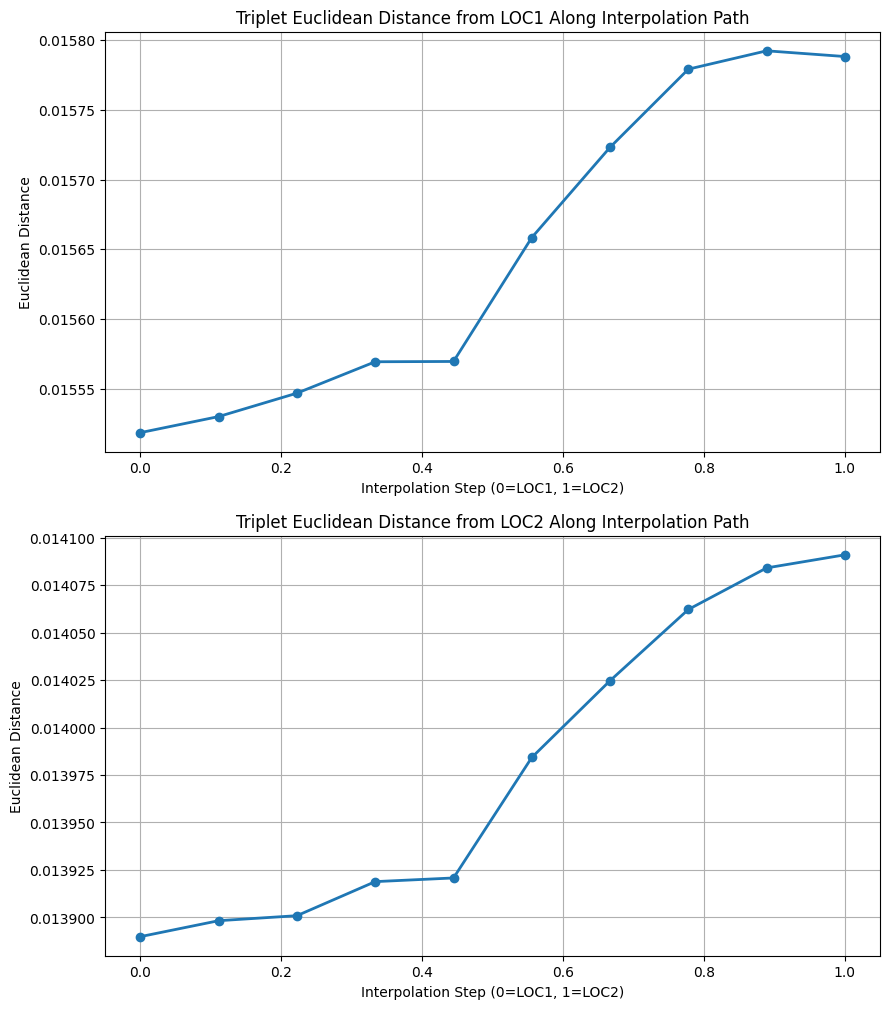

Distance at start (LOC1): 0.0155
Distance at end (LOC2): 0.0158
Distance at start (LOC1): 0.0139
Distance at end (LOC2): 0.0141


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


interpolated_web_embeddings = web_model(vae_model.decode(interpolated_embeddings.reshape(-1, latent_dim)))
LOC1_sample_web_embedding = web_model(source_sample)
LOC2_sample_web_embedding = web_model(LOC2_sample)


# Calculate distances efficiently using broadcasting
distances_to_LOC1 = np.mean((interpolated_web_embeddings - LOC1_sample_web_embedding)**2, axis=1)
distances_to_LOC2 = np.mean((interpolated_web_embeddings - LOC2_sample_web_embedding)**2, axis=1)

# Create x-axis for interpolation steps (0 to 1)
steps = np.linspace(0, 1, len(distances_to_LOC1))

# Plot
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
plt.plot(steps, distances_to_LOC1, '-o', linewidth=2, markersize=6)
plt.title('Triplet Euclidean Distance from LOC1 Along Interpolation Path')
plt.xlabel('Interpolation Step (0=LOC1, 1=LOC2)')
plt.ylabel('Euclidean Distance')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(steps, distances_to_LOC2, '-o', linewidth=2, markersize=6)
plt.title('Triplet Euclidean Distance from LOC2 Along Interpolation Path')
plt.xlabel('Interpolation Step (0=LOC1, 1=LOC2)')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()

# Optional: Print start and end distances to verify
print(f"Distance at start (LOC1): {distances_to_LOC1[0]:.4f}")
print(f"Distance at end (LOC2): {distances_to_LOC1[-1]:.4f}")
print(f"Distance at start (LOC1): {distances_to_LOC2[0]:.4f}")
print(f"Distance at end (LOC2): {distances_to_LOC2[-1]:.4f}")

# Classification Loss

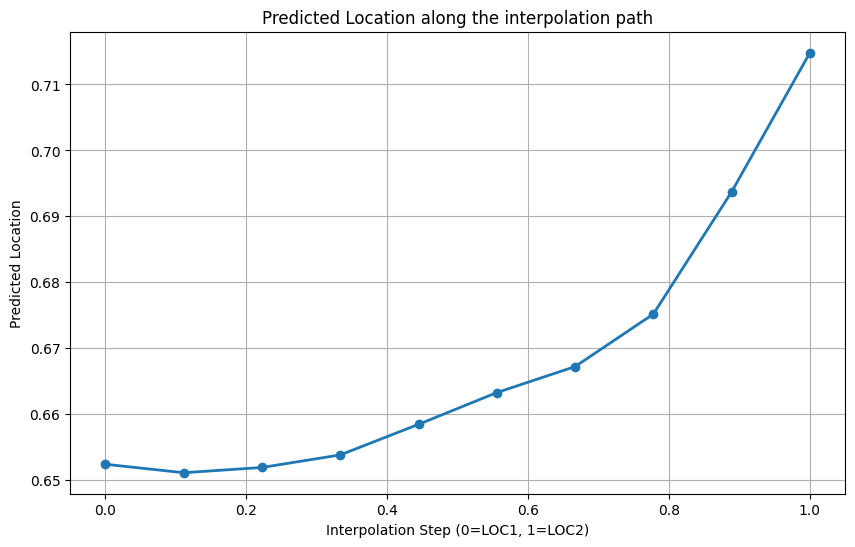

In [10]:
predicted_locations = latent_location_classifier(interpolated_embeddings.reshape(-1, latent_dim))


plt.figure(figsize=(10, 6))
plt.plot(steps, predicted_locations.numpy().reshape(-1), '-o', linewidth=2, markersize=6)
plt.title('Predicted Location along the interpolation path')
plt.xlabel('Interpolation Step (0=LOC1, 1=LOC2)')
plt.ylabel('Predicted Location')
plt.grid(True)
plt.show()

## Domain Translation Network

In [80]:
translator = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(latent_dim, )),
            tf.keras.layers.Dense(latent_dim * 2, activation='relu'),
            tf.keras.layers.Dense(latent_dim * 2, activation='relu'),
            tf.keras.layers.Dense(latent_dim),  # No activation for residual connection
])


source_location, target_location = locations
source_data = train_df[(train_df['Location'] == source_location)].iloc[:, 2:]
target_data = train_df[(train_df['Location'] == target_location)].iloc[:, 2:]
source_latent_embeddings = get_z_embeddings(source_data)
target_latent_embeddings = get_z_embeddings(target_data)

# EXPERIMENTAL
# Parameters

# Group by 'Website' and calculate centroids
# def compute_centroids(df, location, latent_dim):
#     # Filter data for the given location
#     data = df[df['Location'] == location]
#     websites = data['Website'].unique()
    
#     centroids = []
#     for website in websites:
#         # Filter data for the specific website
#         website_data = data[data['Website'] == website].iloc[:, 2:].values  # Exclude 'Location' and 'Website'
#         latent_embeddings = get_z_embeddings(website_data)  # Get latent embeddings
#         centroid = latent_embeddings.mean(axis=0)  # Compute centroid
#         centroids.append(centroid)
    
#     return np.array(centroids), websites

# # Compute centroids for source and target locations
# source_centroids, source_websites = compute_centroids(train_df, source_location, latent_dim)
# target_centroids, target_websites = compute_centroids(train_df, target_location, latent_dim)

# # Ensure the source and target websites match
# # (This assumes that there are corresponding classes in both domains)
# assert set(source_websites) == set(target_websites), "Source and Target websites don't match!"

# # Reorder target centroids to match the order of source websites
# target_centroids = np.array([target_centroids[target_websites.tolist().index(website)] for website in source_websites])


translator.compile(optimizer='adam', loss='mse')
translator.fit(source_latent_embeddings, target_latent_embeddings, epochs=100)

Epoch 1/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 3s 600us/step - loss: 1.6515
Epoch 2/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 486us/step - loss: 1.5009
Epoch 3/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 476us/step - loss: 1.4724
Epoch 4/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 510us/step - loss: 1.4599
Epoch 5/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 454us/step - loss: 1.4560
Epoch 6/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 453us/step - loss: 1.4484
Epoch 7/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - loss: 1.4450
Epoch 8/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step - loss: 1.4435
Epoch 9/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 448us/step - loss: 1.4371
Epoch 10/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 491us/step - loss: 1.4385
Epoch 11/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - loss: 1.4323
Epoch 12/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 479us/step - loss: 1.4346
Epoch 13/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step - loss: 1.4265
Epoch 14/100
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 2s 472us/step - 

# Interpolations using Hyperplanes

In [4]:
def get_hyperplane(domain_discriminator):
    # Get the weights and biases from the domain_discriminator's dense layer
    # Shape: (latent_dim, 2) in TensorFlow
    W = domain_discriminator.layers[0].kernel
    b = domain_discriminator.layers[0].bias   # Shape: (2,)

    # Calculate the hyperplane parameters.  Note the transpose and slicing.
    w = W[:, 0] - W[:, 1]   # Normal vector: (latent_dim,)
    b = b[0] - b[1]       # Offset: scalar

    # Normalize w (optional, but often helpful)
    w = w / tf.norm(w)
    return w, b

w_norm, b = get_hyperplane(domain_discriminator)

In [67]:
# Function to traverse latent space in a specified direction
def traverse_latent_space(z, w_norm, step_size=0.1, steps=10, direction='both'):
    """
    Traverse the latent space along the normalized weight vector.
    
    Parameters:
    - z: Initial latent vector.
    - w_norm: Normalized weight vector (direction of traversal).
    - step_size: Step size for traversal.
    - steps: Number of steps in each direction.
    - direction: Direction of traversal ('forward', 'backward', or 'both').
    
    Returns:
    - np.array: Traversed latent vectors.
    """
    traversals = []
    
    if direction == 'both':
        alphas = np.linspace(-steps, steps, num=2*steps+1)  # Symmetric traversal
    elif direction == 'forward':
        alphas = np.linspace(0, steps, num=steps+1)  # Forward only
    elif direction == 'backward':
        alphas = np.linspace(-steps, 0, num=steps+1)  # Backward only
    else:
        raise ValueError("Direction must be 'both', 'forward', or 'backward'.")
    
    for alpha in alphas:
        z_traversed = z + alpha * step_size * w_norm
        traversals.append(z_traversed)
    
    return np.array(traversals).reshape(-1, latent_dim)


def sample_around_hyperplane(z, w, b, mean=0.0, std=1.0, n_samples=10):
    """
    Projects z onto the hyperplane and generates Gaussian-distributed samples along the normal direction.

    Args:
        z (tf.Tensor): Latent space embedding (batch_size, latent_dim)
        w (tf.Tensor): Normal vector of the hyperplane (latent_dim,)
        b (tf.Tensor): Bias term of the hyperplane (scalar)
        std (float): Standard deviation for sampling.
        n_samples (int): Number of samples per input.

    Returns:
        tf.Tensor: Gaussian-sampled latent embeddings (batch_size, n_samples, latent_dim)
    """
    # Ensure w is normalized
    w = w / tf.norm(w)

    # Compute projection of z onto the hyperplane
    distance_to_boundary = (tf.reduce_sum(z * w, axis=-1) + b) / tf.reduce_sum(w * w)
    z_perpendicular = z - tf.expand_dims(distance_to_boundary, -1) * w  # Projected point

    # Sample Gaussian values for perturbation along the normal direction
    alpha_samples = tf.random.normal((tf.shape(z)[0], n_samples, 1), mean=mean, stddev=std)

    # Compute sampled latent embeddings
    z_samples = z_perpendicular[:, tf.newaxis, :] + alpha_samples * w  # (batch_size, n_samples, latent_dim)

    return z_samples[0]

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np
import matplotlib.pyplot as plt
import warnings

def reduce_and_visualize(reference_data_dict, query_data_dict, method='pca', random_state=42, **kwargs):
    """
    Perform dimensionality reduction and visualization, fitting only on reference data.
    
    Parameters:
    -----------
    reference_data_dict : dict
        Dictionary of reference datasets to fit the reducer on. Format: {'name': array}
    query_data_dict : dict
        Dictionary of query datasets to transform. Format: {'name': array}
    method : str, optional (default='pca')
        Dimensionality reduction method: 'pca', 'tsne', or 'umap'
    random_state : int, optional (default=42)
        Random state for reproducibility
    **kwargs : dict
        Additional parameters for the reduction method or visualization
        
    Returns:
    --------
    tuple: (reducer, dict of reduced reference data, dict of reduced query data)
    """
    # Combine reference data for fitting
    combined_reference = np.vstack(list(reference_data_dict.values()))
    
    # Initialize reducer based on method
    if method.lower() == 'pca':
        reducer = PCA(n_components=2, random_state=random_state)
    elif method.lower() == 'tsne':
        reducer = TSNE(n_components=2, random_state=random_state)
    elif method.lower() == 'umap':
        reducer = umap.UMAP(n_components=2, random_state=random_state)
    else:
        raise ValueError(f"Unsupported method: {method}")
    
    # Fit on reference data only
    if method.lower() == 'pca':
        reducer.fit(combined_reference)
        # Transform reference data
        reduced_reference = {
            name: reducer.transform(data) 
            for name, data in reference_data_dict.items()
        }
        # Transform query data
        reduced_query = {
            name: reducer.transform(data) 
            for name, data in query_data_dict.items()
        }
    else:
        # For TSNE and UMAP, we need to fit_transform all data together
        # First transform reference data
        reduced_combined_reference = reducer.fit_transform(combined_reference)
        
        # Split the reduced reference data
        start_idx = 0
        reduced_reference = {}
        for name, data in reference_data_dict.items():
            end_idx = start_idx + len(data)
            reduced_reference[name] = reduced_combined_reference[start_idx:end_idx]
            start_idx = end_idx
        
        # Transform query data
        reduced_query = {}
        for name, data in query_data_dict.items():
            if method.lower() == 'tsne':
                # For t-SNE, we need to use a different approach for out-of-sample transform
                warnings.warn("t-SNE doesn't support transform of new samples. Consider using PCA or UMAP instead.")
                reduced_query[name] = None
            else:
                reduced_query[name] = reducer.transform(data)
    
    # Create visualization
    plt.figure(figsize=kwargs.get('figsize', (10, 6)))
    
    # Plot reference data
    for name, data in reduced_reference.items():
        plt.scatter(
            data[:, 0], 
            data[:, 1],
            label=name,
            color=kwargs.get('colors', {}).get(name, None),
            marker=kwargs.get('markers', {}).get(name, 'o'),
            alpha=kwargs.get('alpha', 0.6)
        )
    
    # Plot query data
    for name, data in reduced_query.items():
        if data is not None:
            plt.scatter(
                data[:, 0], 
                data[:, 1],
                label=name,
                color=kwargs.get('colors', {}).get(name, None),
                marker=kwargs.get('markers', {}).get(name, '^'),
                alpha=kwargs.get('alpha', 0.6)
            )
    
    plt.title(f"{method.upper()} Visualization - {kwargs.get('title', '')}")
    plt.legend()
    
    if kwargs.get('show', True):
        plt.show()
    
    # return reducer, reduced_reference, reduced_query
    return None

c:\Users\kaush\pyenv\ml_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Randomly select a website sample and interpolate

In [130]:
import random
random.seed()
selected_website = random.sample(test_web_samples, 1)[0]
# selected_website = 8
source_location, target_location = locations

# Get all the samples for the selected data
source_selected_website = test_df[(test_df['Website'] == selected_website) & (test_df['Location'] == source_location)].iloc[:, 2:]
target_selected_website = test_df[(test_df['Website'] == selected_website) & (test_df['Location'] == target_location)].iloc[:, 2:]


_, _, source_selected_latent_embeddings = vae_model.encode(source_selected_website)
_, _, target_selected_latent_embeddings = vae_model.encode(target_selected_website)

# Randomly select any LOC1 sample
source_sample = source_selected_website.sample().to_numpy()
_, _, source_latent_embedding = vae_model.encode(source_sample)

# source_latent_embedding = source_selected_latent_embeddings.numpy().mean(axis=0)

source_selected_website = source_selected_website.to_numpy()
target_selected_website = target_selected_website.to_numpy()


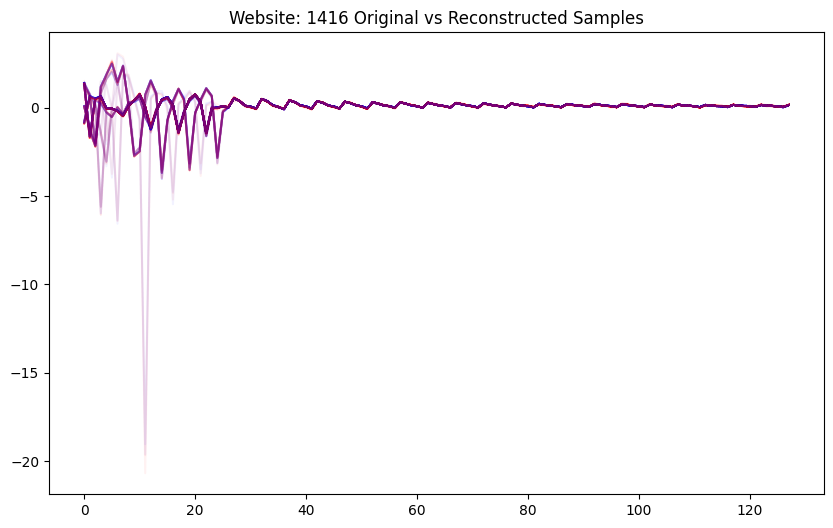

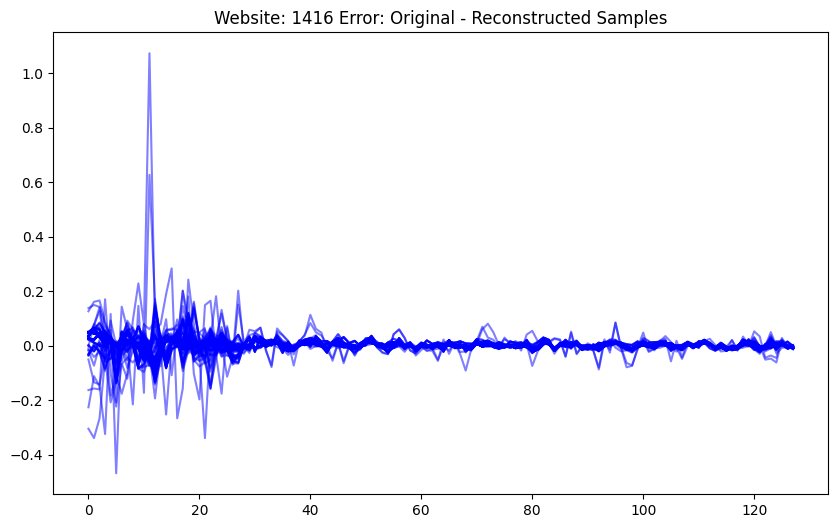

In [131]:
# check reconstruction quality of the distribution
reconstructed_source = vae_model.decode(source_selected_latent_embeddings)

# Visualize the reconstructed samples
plt.figure(figsize=(10, 6))
for i in range(len(source_selected_website)):
    plt.plot(source_selected_website[i], label='Original', alpha=0.05, c='b')
    plt.plot(reconstructed_source[i], label='Reconstructed', alpha=0.05, c='r')
plt.title(f'Website: {selected_website} Original vs Reconstructed Samples')
plt.show()

# error
plt.figure(figsize=(10, 6))
for i in range(len(source_selected_website)):
    plt.plot(source_selected_website[i] - reconstructed_source[i], label='Error', alpha=0.5, c='b')
plt.title(f'Website: {selected_website} Error: Original - Reconstructed Samples')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
tf.Tensor(
[[6.5558148e-03 9.9344420e-01]
 [9.7731197e-01 2.2688041e-02]
 [9.9999642e-01 3.5564017e-06]
 [1.0000000e+00 5.4482890e-10]
 [1.0000000e+00 8.3465942e-14]
 [1.0000000e+00 1.2786670e-17]
 [1.0000000e+00 1.9588628e-21]
 [1.0000000e+00 3.0009055e-25]
 [1.0000000e+00 4.5973100e-29]
 [1.0000000e+00 7.0428539e-33]
 [1.0000000e+00 1.0789474e-36]], shape=(11, 2), dtype=float32)
tf.Tensor([1 0 0 0 0 0 0 0 0 0 0], shape=(11,), dtype=int64)


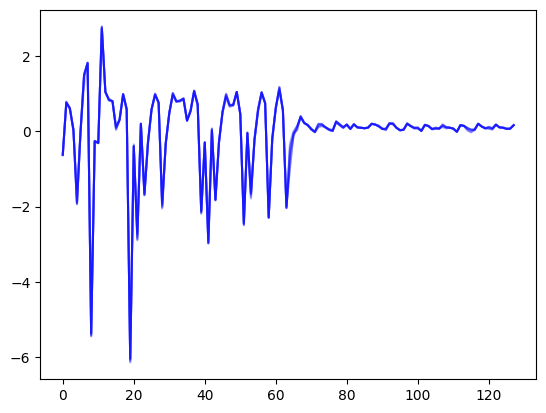

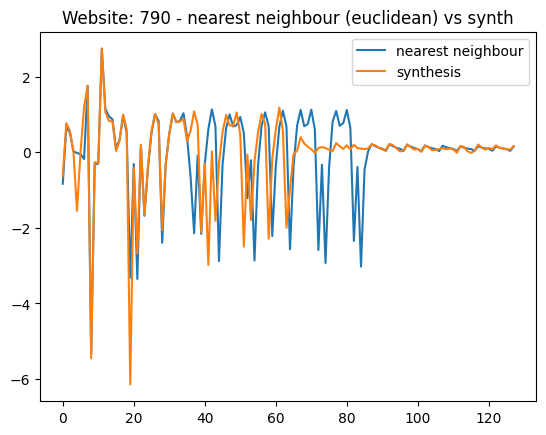

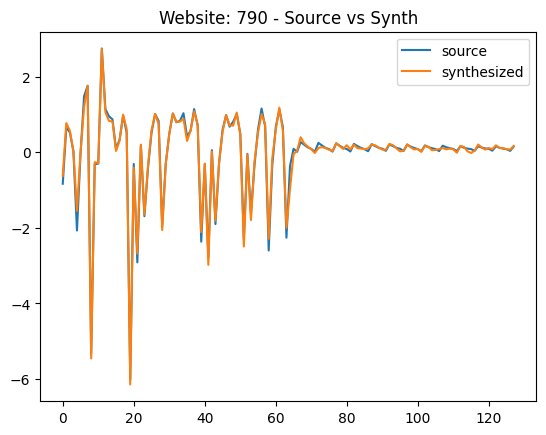

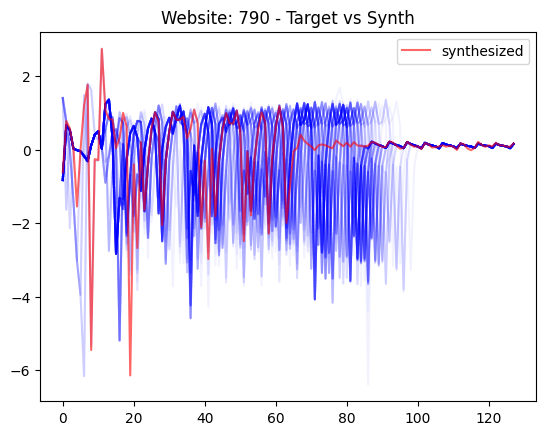

In [114]:
from sklearn.metrics.pairwise import euclidean_distances


def find_most_similar_vector(input_vector: np.ndarray, target_data: np.ndarray) -> np.ndarray:
    """
    Finds the most similar 1D vector from target_data based on cosine similarity.
    
    Parameters:
        input_vector (np.ndarray): The input 1D vector.
        target_data (np.ndarray): A 2D numpy array where each row is a target 1D vector.
    
    Returns:
        np.ndarray: The most similar 1D vector from target_data.
    """
    # Ensure input_vector is 2D for compatibility with cosine_similarity
    input_vector = input_vector.reshape(1, -1)
    
    # Compute cosine similarities
    similarities = euclidean_distances(input_vector, target_data)
    
    # Find the index of the most similar vector
    most_similar_idx = np.argmax(similarities)
    
    return target_data[most_similar_idx]

def find_elementwise_most_similar_vector(input_vector: np.ndarray, target_data: np.ndarray) -> np.ndarray:
    """
    Finds the most similar 1D vector from target_data based on element-wise comparison.
    
    Parameters:
        input_vector (np.ndarray): The input 1D vector.
        target_data (np.ndarray): A 2D numpy array where each row is a target 1D vector.
    
    Returns:
        np.ndarray: The most similar 1D vector from target_data based on element-wise similarity.
    """
    # Compute element-wise absolute differences
    differences = np.abs(target_data - input_vector)
    
    # Sum the differences for each vector
    total_differences = np.sum(differences, axis=1)
    
    # Find the index of the vector with the smallest total difference
    most_similar_idx = np.argmin(total_differences)
    
    return target_data[most_similar_idx]

def plot_synth_and_nearest_neighbour(synth, target_data):
    # distances = tf.sqrt(tf.reduce_mean(tf.square(target_data - synth), axis=1))

    # # Find the index of the closest embedding
    # nearest_neighbor_index = tf.argmin(distances)

    # # Get the nearest neighbor embedding and its distance
    # nearest_neighbor = target_data[nearest_neighbor_index]
    # nearest_distance = distances[nearest_neighbor_index]
    nearest_neighbor = find_elementwise_most_similar_vector(synth[0].numpy(), target_data)
    
    plt.figure()
    # plt.plot(nearest_neighbor_reconstructed[0], label='nearest neighbour recon', alpha=0.5)
    plt.plot(nearest_neighbor, label='nearest neighbour', alpha=1)
    plt.plot(synth[0], label='synthesis')
    plt.title(f"Website: {selected_website} - nearest neighbour (euclidean) vs synth")
    plt.legend()
    plt.show()
    plt.close()

def plot_synth_and_source(synth, source, vae_model):
    plt.figure()
    plt.plot(source[0], label='source')
    plt.plot(synth[0], label='synthesized')
    plt.title(f"Website: {selected_website} - Source vs Synth")
    plt.legend()
    plt.show()
    plt.close()

def plot_trace_distribution_and_synth(synth, traces, title):
    plt.figure()
    for i in range(traces.shape[0]):
        plt.plot(traces[i, :], alpha=0.05, c='b')
    plt.plot(synth[0, :], c='r', label='synthesized', alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.show()
    plt.close()


num_steps = 10
traversed_z_forward = traverse_latent_space(source_latent_embedding.numpy(), w_norm, step_size=1.0, steps=num_steps, direction='backward')

# check the traversals are in the right direction by using the domain discriminator
domain_logits = domain_discriminator.predict(traversed_z_forward)
domain_probs = tf.nn.softmax(domain_logits)
domain_preds = tf.argmax(domain_probs, axis=1)
print(domain_probs)
print(domain_preds)

plt.figure()
for i in range(num_steps):
    plt.plot(vae_model.decode(traversed_z_forward[i].reshape(1, -1))[0], alpha=0.2, c='b')
plt.show()

synth = vae_model.decode(traversed_z_forward[0].reshape(1, -1))
plot_synth_and_nearest_neighbour(synth, target_selected_website)
plot_synth_and_source(synth, source_sample, vae_model)
plot_trace_distribution_and_synth(synth, target_selected_website, f'Website: {selected_website} - Target vs Synth')

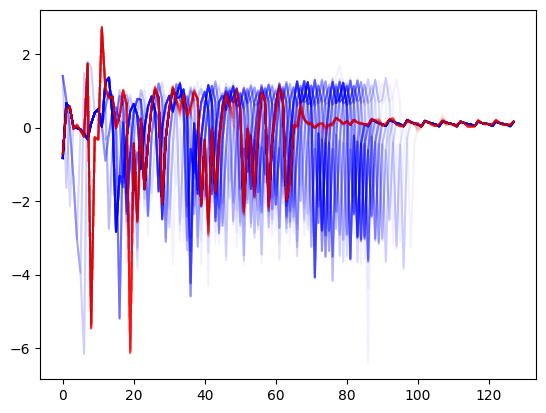

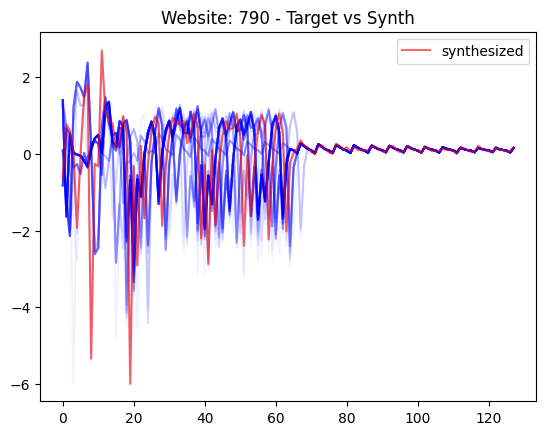

In [116]:
n_samples = 100
z_samples = sample_around_hyperplane(source_latent_embedding, w_norm, b, mean=-4.0, std=2.0, n_samples=n_samples)

plt.figure()

for i in range(target_selected_website.shape[0]):
        plt.plot(target_selected_website[i, :], alpha=0.05, c='b')

for i in range(n_samples):
    plt.plot(vae_model.decode(z_samples[i].numpy().reshape(1, -1))[0], alpha=0.02, c='r')
plt.show()

# check the traversals are in the right direction by using the domain discriminator
# domain_logits = domain_discriminator.predict(z_samples.numpy().reshape(-1, latent_dim))
# domain_probs = tf.nn.softmax(domain_logits)
# domain_preds = tf.argmax(domain_probs, axis=1)
# print(domain_probs)
# print(domain_preds)



plot_trace_distribution_and_synth(vae_model.decode(source_latent_embedding), source_selected_website, f'Website: {selected_website} - Target vs Synth')

## no need to run these

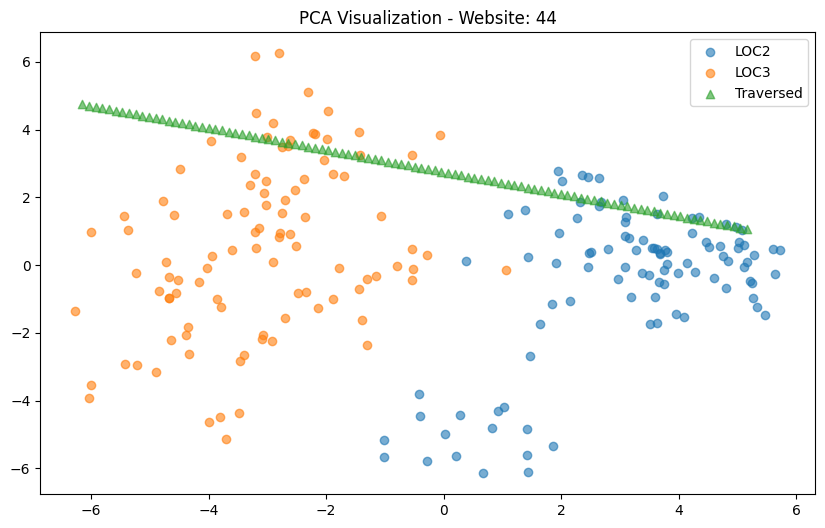

c:\Users\kaush\pyenv\ml_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kaush\pyenv\ml_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\kaush\pyenv\ml_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


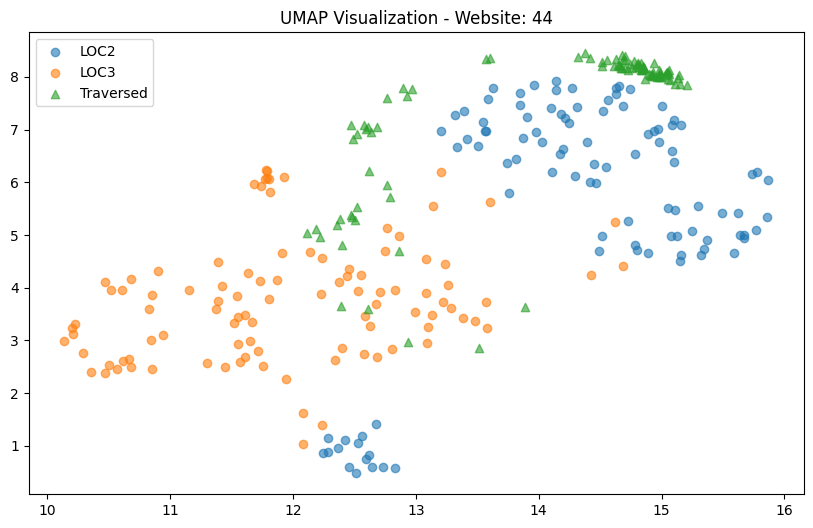

In [22]:
# Prepare your data in a dictionary
reference_data = {
    source_location: source_selected_latent_embeddings,
    target_location: target_selected_latent_embeddings
}

query_data = {
    'Traversed': traversed_z_forward
}



reduce_and_visualize(
    reference_data,
    query_data,
    method='pca',
    title=f"Website: {selected_website}",
)

reduce_and_visualize(
    reference_data,
    query_data,
    method='UMAP',
    title=f"Website: {selected_website}"
)

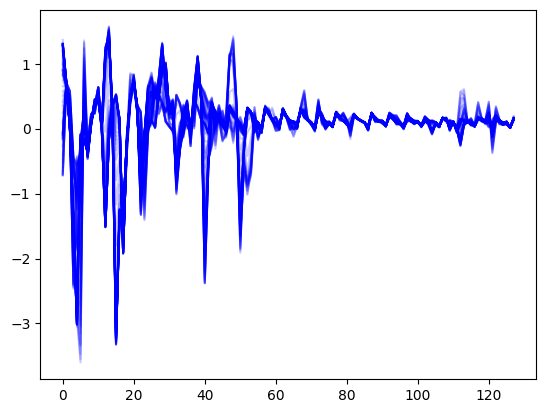

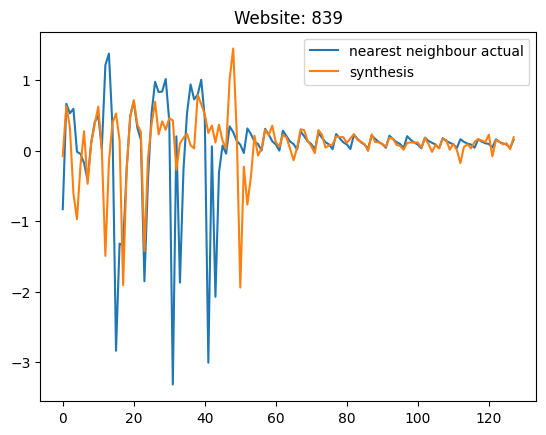

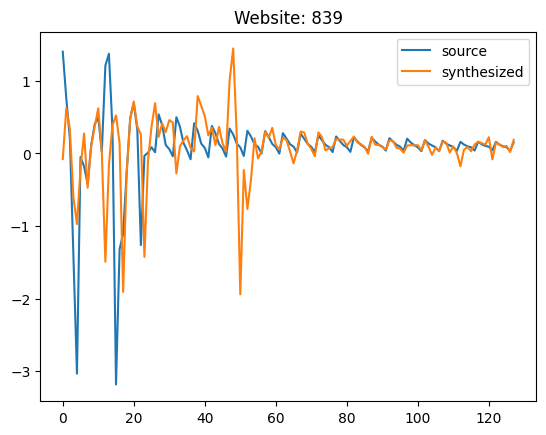

In [86]:
def plot_synth_and_nearest_neighbour(z_new, target_latent_embeddings, target_data, vae_model):
    synth = vae_model.decode(z_new.reshape(1, -1))

    distances = tf.sqrt(tf.reduce_mean(tf.square(target_latent_embeddings - z_new.reshape(1, -1)), axis=1))

    # Find the index of the closest embedding
    nearest_neighbor_index = tf.argmin(distances)

    # Get the nearest neighbor embedding and its distance
    nearest_neighbor = target_latent_embeddings[nearest_neighbor_index].numpy()
    nearest_distance = distances[nearest_neighbor_index]

    nearest_neighbor_reconstructed = vae_model.decode(nearest_neighbor.reshape(1, -1))
    nearest_neighbor_actual = target_data[nearest_neighbor_index]
    
    plt.figure()
    # plt.plot(nearest_neighbor_reconstructed[0], label='nearest neighbour recon', alpha=0.5)
    plt.plot(nearest_neighbor_actual, label='nearest neighbour actual', alpha=1)
    plt.plot(synth[0], label='synthesis')
    plt.title(f"Website: {selected_website}")
    plt.legend()
    plt.show()
    plt.close()

def plot_synth_and_source(z_new, source, vae_model):
    synth = vae_model.decode(z_new.reshape(1, -1))
    plt.figure()
    plt.plot(source[0], label='source')
    plt.plot(synth[0], label='synthesized')
    plt.title(f"Website: {selected_website}")
    plt.legend()
    plt.show()
    plt.close()
    

plt.figure()
for i in range(num_steps):
    plt.plot(vae_model.decode(traversed_z_forward[i].reshape(1, -1))[0], alpha=0.2, c='b')
plt.show()

plot_synth_and_nearest_neighbour(traversed_z_forward[-1], target_selected_latent_embeddings, target_selected_website, vae_model)
plot_synth_and_source(traversed_z_forward[-1], source_sample, vae_model)


# Jumping directly to the other side of the plane in the direction normal to the hyperplane

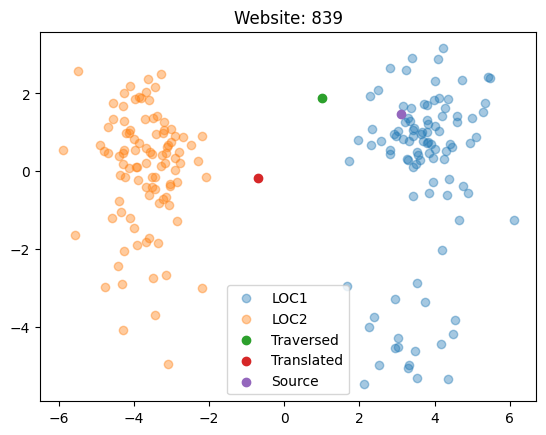

/home/asil0892/doh_traffic_analysis/.venv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


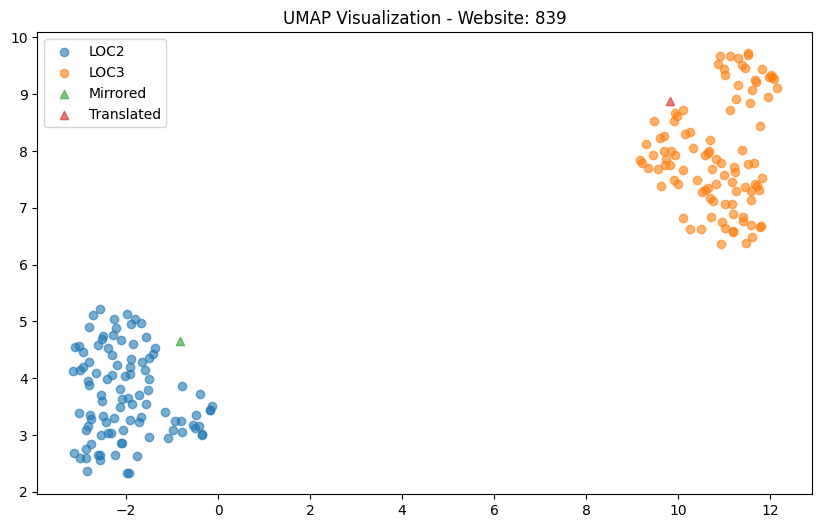

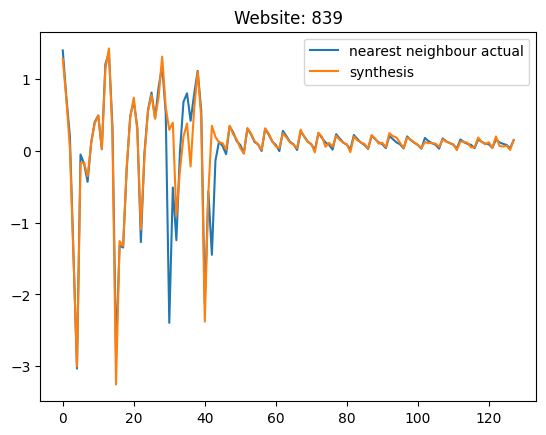

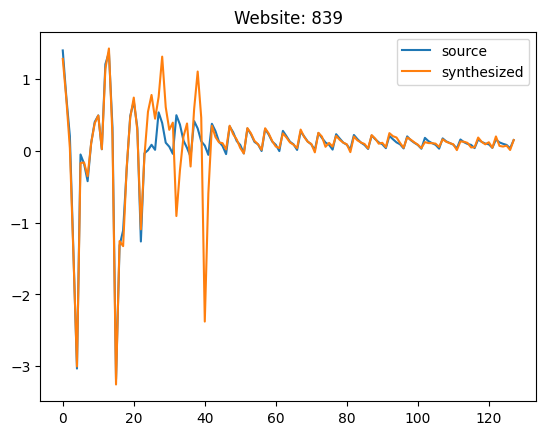

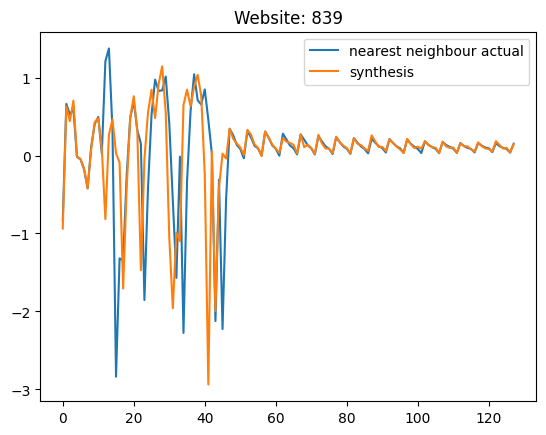

In [87]:
import numpy as np
from sklearn.decomposition import PCA
def jump_to_other_side(z, w, b, alpha=0.1, mirrored=True):
    """
    Jump directly to the other side of the hyperplane.
    
    Parameters:
    - z: The current latent vector (numpy array).
    - w: The normal vector of the hyperplane.
    - b: The bias term of the hyperplane.
    - alpha: Additional step size to cross to the other side.
    
    Returns:
    - z_new: The updated latent vector on the other side.
    """
    # Compute the current value of the decision function
    decision_value = np.dot(w, z) + b
    
    # Compute the displacement to the hyperplane
    delta_z = -decision_value / np.dot(w, w) * w
    
    if mirrored:
        # mirror image of the point
        z_new = z + 2 * delta_z
    else: 
        # Add an additional step to cross the hyperplane
        z_new = z + delta_z + alpha * w

    return z_new


z_traversed = jump_to_other_side(source_latent_embedding[0].numpy(), w_norm, bias, mirrored=True, alpha=5.0)
pca = PCA(n_components=2)

pca.fit(np.vstack((source_selected_latent_embeddings, target_selected_latent_embeddings)))

LOC1_pca_embeddings = pca.transform(source_selected_latent_embeddings)
LOC2_pca_embeddings = pca.transform(target_selected_latent_embeddings)
start_point_pca_embedding = pca.transform(source_latent_embedding)
traversed_pca_embedding = pca.transform(z_traversed.reshape(1, -1))

translated_z = translator(source_latent_embedding)
translated_pca_embedding = pca.transform(translated_z)

plt.figure()
plt.scatter(LOC1_pca_embeddings[:, 0], LOC1_pca_embeddings[:, 1], label='LOC1', alpha=0.4)
plt.scatter(LOC2_pca_embeddings[:, 0], LOC2_pca_embeddings[:, 1], label='LOC2', alpha=0.4)
plt.scatter(traversed_pca_embedding[:, 0], traversed_pca_embedding[:, 1], label='Traversed')
plt.scatter(translated_z[:, 0], translated_z[:, 1], label='Translated')
plt.scatter(start_point_pca_embedding[:, 0], start_point_pca_embedding[:, 1], label='Source')
plt.title(f"Website: {selected_website}")
plt.legend()
plt.show()

reduce_and_visualize(
    reference_data,
    {'Mirrored': z_traversed.reshape(1, -1),
    'Translated': translated_z},
    method='UMAP',
    title=f"Website: {selected_website}"
)
plot_synth_and_nearest_neighbour(z_traversed, target_selected_latent_embeddings, target_selected_website, vae_model)
plot_synth_and_source(z_traversed, source_sample, vae_model)


plot_synth_and_nearest_neighbour(translator(source_latent_embedding).numpy(), target_selected_latent_embeddings, target_selected_website, vae_model)